In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df_segmentation = pd.read_csv('p002_1.csv', sep=';', decimal=",")
df_segmentation.head()

,Qualifikation,Schnitt,Bundesland,2athe,Physik,Deutsch,Schultyp,OLT-2athe,OLT-1,Studierfähigkeitstest,Alter,Geschlecht,Jahreseinkommen der Eltern,Staatsbürgerschaft,Studiengang,Abschluss
0,1,2.3,5,2.2,2.2,1.2,1,49,74,0,18,2,87000,2,5,2.3
1,2,3.6,1,0.0,0.0,0.0,0,20,26,887,20,1,67000,1,3,5.0
2,2,1.7,1,0.0,0.0,0.0,0,46,56,785,18,1,63000,1,1,5.0
3,1,2.4,1,3.6,3.8,2.3,1,36,55,0,20,2,126000,1,2,3.2
4,1,2.3,1,2.0,1.8,2.2,1,66,66,0,17,2,45000,1,3,2.2


In [3]:
df_segmentation['Abschluss'][0] == 5.0
df_segmentation.head()

,Qualifikation,Schnitt,Bundesland,2athe,Physik,Deutsch,Schultyp,OLT-2athe,OLT-1,Studierfähigkeitstest,Alter,Geschlecht,Jahreseinkommen der Eltern,Staatsbürgerschaft,Studiengang,Abschluss
0,1,2.3,5,2.2,2.2,1.2,1,49,74,0,18,2,87000,2,5,2.3
1,2,3.6,1,0.0,0.0,0.0,0,20,26,887,20,1,67000,1,3,5.0
2,2,1.7,1,0.0,0.0,0.0,0,46,56,785,18,1,63000,1,1,5.0
3,1,2.4,1,3.6,3.8,2.3,1,36,55,0,20,2,126000,1,2,3.2
4,1,2.3,1,2.0,1.8,2.2,1,66,66,0,17,2,45000,1,3,2.2


In [4]:
len(df_segmentation[(df_segmentation['Abschluss'] < 5)])

82

In [5]:
for i in range (len(df_segmentation)):
    if df_segmentation['Abschluss'][i] < 5.0:
        df_segmentation['Abschluss'][i] = 1
    else:
        df_segmentation['Abschluss'][i] = 0
df_segmentation.head()

<ipython-input-5-67065e3eddee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segmentation['Abschluss'][i] = 1
<ipython-input-5-67065e3eddee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_segmentation['Abschluss'][i] = 0


,Qualifikation,Schnitt,Bundesland,2athe,Physik,Deutsch,Schultyp,OLT-2athe,OLT-1,Studierfähigkeitstest,Alter,Geschlecht,Jahreseinkommen der Eltern,Staatsbürgerschaft,Studiengang,Abschluss
0,1,2.3,5,2.2,2.2,1.2,1,49,74,0,18,2,87000,2,5,1.0
1,2,3.6,1,0.0,0.0,0.0,0,20,26,887,20,1,67000,1,3,0.0
2,2,1.7,1,0.0,0.0,0.0,0,46,56,785,18,1,63000,1,1,0.0
3,1,2.4,1,3.6,3.8,2.3,1,36,55,0,20,2,126000,1,2,1.0
4,1,2.3,1,2.0,1.8,2.2,1,66,66,0,17,2,45000,1,3,1.0


In [6]:
# plt.figure(figsize = (12, 9))
# plt.scatter(df_segmentation.iloc[:, 2], df_segmentation.iloc[:, 4])
# plt.xlabel('Bundesland')
# plt.ylabel('Physik')
# plt.title('Visualisatin')

In [7]:
df_segmentation

,Qualifikation,Schnitt,Bundesland,2athe,Physik,Deutsch,Schultyp,OLT-2athe,OLT-1,Studierfähigkeitstest,Alter,Geschlecht,Jahreseinkommen der Eltern,Staatsbürgerschaft,Studiengang,Abschluss
0,1,2.3,5,2.2,2.2,1.2,1,49,74,0,18,2,87000,2,5,1.0
1,2,3.6,1,0.0,0.0,0.0,0,20,26,887,20,1,67000,1,3,0.0
2,2,1.7,1,0.0,0.0,0.0,0,46,56,785,18,1,63000,1,1,0.0
3,1,2.4,1,3.6,3.8,2.3,1,36,55,0,20,2,126000,1,2,1.0
4,1,2.3,1,2.0,1.8,2.2,1,66,66,0,17,2,45000,1,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,1.8,1,2.9,2.5,2.7,1,51,59,854,18,2,79000,1,1,1.0
96,4,2.0,1,0.0,0.0,0.0,0,40,53,883,20,2,36000,1,3,0.0
97,1,3.8,1,2.2,2.2,2.3,1,63,57,0,19,2,110000,1,3,1.0
98,2,2.1,1,0.0,0.0,0.0,0,35,55,763,21,2,67000,2,2,1.0


In [8]:
scaler = StandardScaler()
num_columns = 15

segmentation_std = scaler.fit_transform(df_segmentation)
abschluss = df_segmentation['Abschluss']
Bundesland = df_segmentation['Bundesland']
JahreseinkommenderEltern = df_segmentation['Jahreseinkommen der Eltern']
Staatsbürgerschaft = df_segmentation['Staatsbürgerschaft']
Schnitt = df_segmentation['Schnitt']
Geschlecht = df_segmentation['Geschlecht']
del df_segmentation['Abschluss']
del df_segmentation['Bundesland']
del df_segmentation['Jahreseinkommen der Eltern']
del df_segmentation['Staatsbürgerschaft']
del df_segmentation['Schnitt']
del df_segmentation['Geschlecht']
segmentation_std = scaler.fit_transform(df_segmentation)
df_segmentation

,Qualifikation,2athe,Physik,Deutsch,Schultyp,OLT-2athe,OLT-1,Studierfähigkeitstest,Alter,Studiengang
0,1,2.2,2.2,1.2,1,49,74,0,18,5
1,2,0.0,0.0,0.0,0,20,26,887,20,3
2,2,0.0,0.0,0.0,0,46,56,785,18,1
3,1,3.6,3.8,2.3,1,36,55,0,20,2
4,1,2.0,1.8,2.2,1,66,66,0,17,3
...,...,...,...,...,...,...,...,...,...,...
95,1,2.9,2.5,2.7,1,51,59,854,18,1
96,4,0.0,0.0,0.0,0,40,53,883,20,3
97,1,2.2,2.2,2.3,1,63,57,0,19,3
98,2,0.0,0.0,0.0,0,35,55,763,21,2


In [9]:
segmentation_std

array([[-0.45749571,  0.47141766,  0.54531691, -0.3427439 , -0.06030227,
        -0.43956514,  0.65785269, -0.50987485, -0.55309988,  1.49589891],
       [ 1.06748999, -1.55816913, -1.35594648, -1.59668498, -1.26634765,
        -1.83424665, -2.41084789,  2.13491458,  0.36111479,  0.04356987],
       [ 1.06748999, -1.55816913, -1.35594648, -1.59668498, -1.26634765,
        -0.58384254, -0.49291003,  1.83077871, -0.55309988, -1.40875917],
       [-0.45749571,  1.76297289,  1.92805392,  0.8067021 , -0.06030227,
        -1.06476719, -0.55684129, -0.50987485,  0.36111479, -0.68259465],
       [-0.45749571,  0.28690977,  0.19963266,  0.70220701, -0.06030227,
         0.37800678,  0.14640259, -0.50987485, -1.01020721,  0.04356987],
       [ 1.06748999, -1.55816913, -1.35594648, -1.59668498, -1.26634765,
        -1.06476719, -1.32401644,  1.77412595,  0.36111479,  0.76973439],
       [-0.45749571, -0.35886785, -0.40531479,  0.07523647, -0.06030227,
         1.00320884,  0.33819638, -0.50987485

In [10]:
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [11]:
pca.explained_variance_ratio_

array([0.52897362, 0.12247221, 0.10200397, 0.07779944, 0.05427867,
       0.04265755, 0.0349693 , 0.02202736, 0.01184137, 0.0029765 ])

Text(0, 0.5, 'Cumulative Explained Variance')

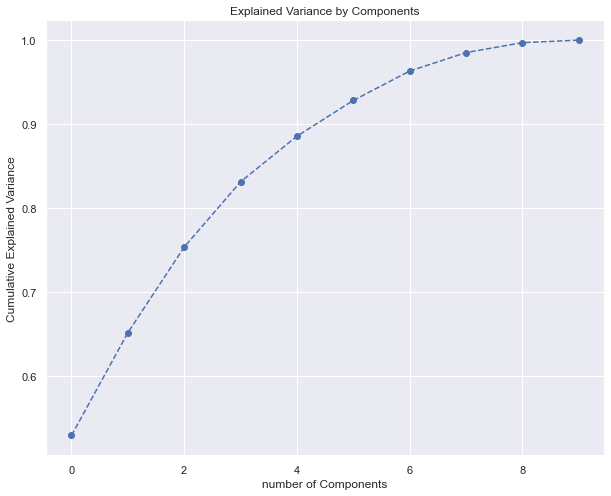

In [12]:
plt.figure(figsize = (10, 8))
# plt.plot(range(0,num_columns), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.plot(range(0,10), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('number of Components')
plt.ylabel('Cumulative Explained Variance')

In [13]:
pca = PCA(n_components = 3)

In [14]:
pca.fit(segmentation_std)

PCA(n_components=3)

In [15]:
pca.transform(segmentation_std)

array([[-0.72196723,  0.02705859, -1.19017653],
       [ 4.43410855, -0.99442613, -0.36212413],
       [ 3.14420709,  0.12413726,  1.58423585],
       [-1.37595471, -2.60071559,  0.13983522],
       [-1.22301596, -0.10197779, -0.24667075],
       [ 3.83178617,  0.10166409, -0.65281221],
       [-0.54612113,  0.631721  ,  1.3430201 ],
       [ 3.74899732,  0.39154069,  1.10130372],
       [-0.38949445,  0.46284685, -0.34597814],
       [-0.51008373,  0.73232493, -1.28371126],
       [-1.26060166, -1.13810815,  1.38438271],
       [-1.86808235, -2.46019869,  1.09097934],
       [-1.14785687,  0.8064277 ,  1.51691583],
       [-0.87753731,  1.32104975, -1.15830234],
       [ 4.01132411,  0.53299823,  1.92388191],
       [-1.33750291, -1.05246578,  1.0157973 ],
       [ 4.57313321, -0.07398514, -0.55296252],
       [-0.78385662,  0.45794496, -0.36671412],
       [-0.61141163,  1.43212888, -1.50956385],
       [-0.9596058 ,  0.63734916, -1.35976989],
       [-2.25121797, -0.41249427, -0.267

help(PCA)

In [16]:
pca.components_

array([[ 0.37420088, -0.36070273, -0.33945277, -0.36801694, -0.32719037,
        -0.29215349, -0.25224575,  0.35218081,  0.31316353,  0.03263059],
       [ 0.03556148, -0.40031574, -0.36746588, -0.20212591,  0.28183344,
         0.58947763,  0.40912777, -0.03853419,  0.05144944,  0.25330851],
       [ 0.02477323, -0.04299455,  0.03939352, -0.20435388,  0.04960907,
         0.05764032,  0.33785979,  0.12926419,  0.04987382, -0.90282671]])

### Hier ist die Component 1 (erste Array) wichtig zum Entscheiden

In [17]:
head = df_segmentation.columns.values

In [18]:
summe = sum(abs(pca.components_[0]))
z = 0
for i in pca.components_[0]:
    a = round(abs(i)/summe, 3)
    print(head[z] + ': ', a)
    z += 1

Qualifikation:  0.124
2athe:  0.12
Physik:  0.113
Deutsch:  0.122
Schultyp:  0.109
OLT-2athe:  0.097
OLT-1:  0.084
Studierfähigkeitstest:  0.117
Alter:  0.104
Studiengang:  0.011


In [19]:
scores_pca = pca.transform(segmentation_std)

In [20]:
(sum(pca.components_[0]))/10

-0.08675862369284564

In [21]:
df_segmentation

,Qualifikation,2athe,Physik,Deutsch,Schultyp,OLT-2athe,OLT-1,Studierfähigkeitstest,Alter,Studiengang
0,1,2.2,2.2,1.2,1,49,74,0,18,5
1,2,0.0,0.0,0.0,0,20,26,887,20,3
2,2,0.0,0.0,0.0,0,46,56,785,18,1
3,1,3.6,3.8,2.3,1,36,55,0,20,2
4,1,2.0,1.8,2.2,1,66,66,0,17,3
...,...,...,...,...,...,...,...,...,...,...
95,1,2.9,2.5,2.7,1,51,59,854,18,1
96,4,0.0,0.0,0.0,0,40,53,883,20,3
97,1,2.2,2.2,2.3,1,63,57,0,19,3
98,2,0.0,0.0,0.0,0,35,55,763,21,2


In [22]:
wcss = []
for i in range(1, 10):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

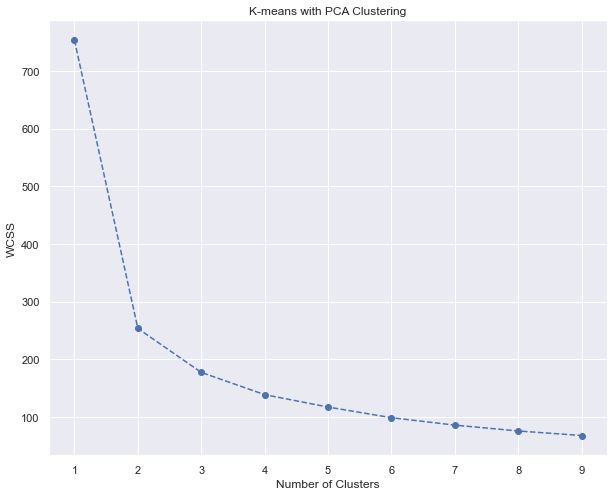

In [23]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [24]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)

In [25]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [26]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
# df_segm_pca_kmeans.columns.values[-6: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6']
df_segm_pca_kmeans.columns.values[-3:] = ['Component 1', 'Component 2', 'Component 3']
len(kmeans_pca.labels_)
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [27]:
df_segm_pca_kmeans

,Qualifikation,2athe,Physik,Deutsch,Schultyp,OLT-2athe,OLT-1,Studierfähigkeitstest,Alter,Studiengang,Component 1,Component 2,Component 3,Segment K-means PCA
0,1,2.2,2.2,1.2,1,49,74,0,18,5,-0.721967,0.027059,-1.190177,1
1,2,0.0,0.0,0.0,0,20,26,887,20,3,4.434109,-0.994426,-0.362124,2
2,2,0.0,0.0,0.0,0,46,56,785,18,1,3.144207,0.124137,1.584236,2
3,1,3.6,3.8,2.3,1,36,55,0,20,2,-1.375955,-2.600716,0.139835,3
4,1,2.0,1.8,2.2,1,66,66,0,17,3,-1.223016,-0.101978,-0.246671,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2.9,2.5,2.7,1,51,59,854,18,1,-0.603943,-1.813084,1.105070,3
96,4,0.0,0.0,0.0,0,40,53,883,20,3,4.854790,0.387697,0.350528,2
97,1,2.2,2.2,2.3,1,63,57,0,19,3,-0.971781,-0.597404,-0.419459,3
98,2,0.0,0.0,0.0,0,35,55,763,21,2,3.744929,0.043163,0.936456,2


In [28]:
df_segment_pca_kmeans = pd.concat([df_segm_pca_kmeans, abschluss], axis = 1)

In [29]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'first',
                                                                               1:'second',
                                                                               2:'third',
                                                                               3:'fourth'})
#                                                                                4:'fifth',
#                                                                                5:'sixth',
#                                                                                6:'seventh'})
# df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'first',
#                                                                                1:'second'})

In [30]:
df_segmentation

,Qualifikation,2athe,Physik,Deutsch,Schultyp,OLT-2athe,OLT-1,Studierfähigkeitstest,Alter,Studiengang
0,1,2.2,2.2,1.2,1,49,74,0,18,5
1,2,0.0,0.0,0.0,0,20,26,887,20,3
2,2,0.0,0.0,0.0,0,46,56,785,18,1
3,1,3.6,3.8,2.3,1,36,55,0,20,2
4,1,2.0,1.8,2.2,1,66,66,0,17,3
...,...,...,...,...,...,...,...,...,...,...
95,1,2.9,2.5,2.7,1,51,59,854,18,1
96,4,0.0,0.0,0.0,0,40,53,883,20,3
97,1,2.2,2.2,2.3,1,63,57,0,19,3
98,2,0.0,0.0,0.0,0,35,55,763,21,2


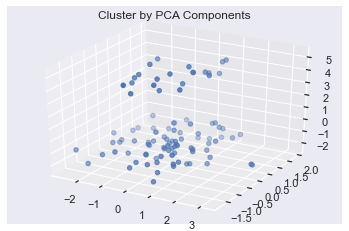

In [31]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 3']
z_axis = df_segm_pca_kmeans['Component 1']
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
ax.scatter(x_axis, y_axis, z_axis, cmap=['r', 'g','b'])
# sns.scatterplot(x_axis, y_axis, z_axis, hue = df_segm_pca_kmeans['Segment'], palette = ['r', 'g', 'b'])
plt.title('Cluster by PCA Components')
plt.show()

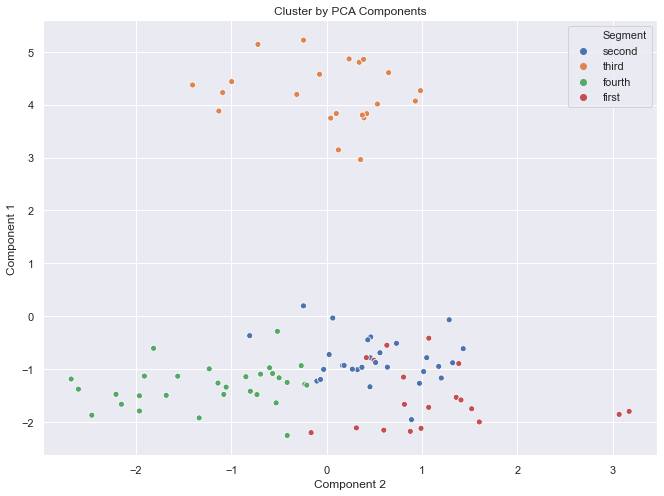

In [32]:
from matplotlib.colors import ListedColormap
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (11, 8))
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], cmap="brg")
plt.title('Cluster by PCA Components')
plt.show()

### Hier sieht man dass, die Component 1 am meisten Aussage hat. D.h. wenn man Component 1 weg lässt, dann kann man keine Kategorie erzeugen.

SyntaxError: invalid syntax (<ipython-input-33-f188d5ac1197>, line 1)